In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import math
import pandas as pd
from IPython.display import clear_output

In [11]:
# import iris data

iris = datasets.load_iris()
X = iris.data[:, :2]  # only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

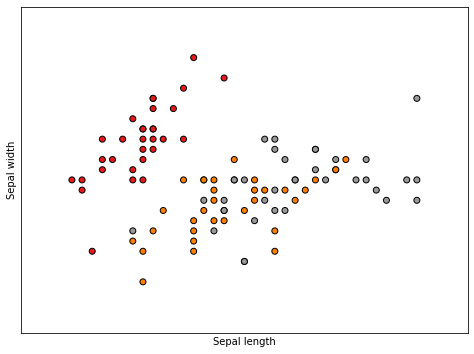

In [12]:
def draw_points(X, y):
    clear_output(wait=True)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

    plt.figure(2, figsize=(8, 6))
    plt.clf()

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
                edgecolor='k')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

draw_points(X_train, y_train)

In [13]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.50      0.53      0.52        15
           2       0.56      0.56      0.56        16

    accuracy                           0.70        50
   macro avg       0.69      0.68      0.68        50
weighted avg       0.71      0.70      0.70        50



# Bagging & Pasting - without voting
### Only difference:
- When sample for **bagging**, we sample with replacement
- Without replacement, it's **pasting**

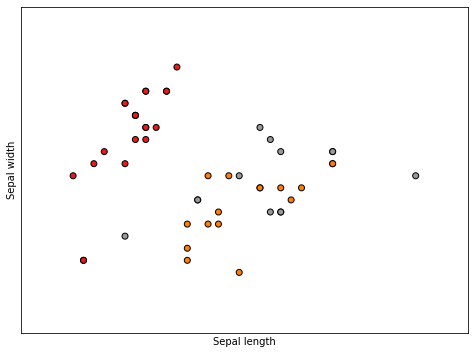

In [14]:
def sample_new_X_y(X,y, with_replacement=True):
    # With replacement = bagging 
    # Without replacement = pasting
    
    X_sample = pd.DataFrame(X).sample(int(math.sqrt(len(X)) * 5), # original: 150
                                                                  # now: sqrt(150)*5 --> a subset of the original
                                      replace=with_replacement)   # Bagging
    y_sample = y[X_sample.index]
    return X_sample.to_numpy(), y_sample

X_sample, y_sample = sample_new_X_y(X_train, y_train)

draw_points(X_sample, y_sample)

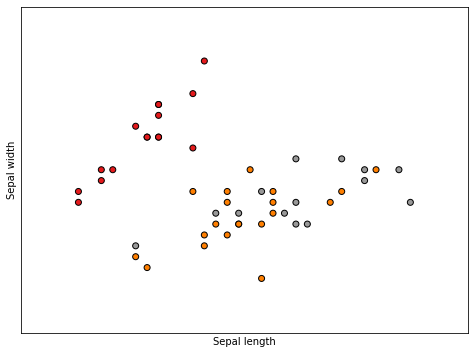

Classifier number 10
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.62      0.53      0.57        15
           2       0.63      0.75      0.69        16

    accuracy                           0.76        50
   macro avg       0.75      0.74      0.74        50
weighted avg       0.77      0.76      0.76        50



In [15]:
import time
from sklearn.metrics import f1_score


def get_scores_and_clf_list(model=DecisionTreeClassifier, draw=True):
    classifier_list = []
    scores = []
    for i in range(10):
        current_classifier = model()
        X_sample, y_sample = sample_new_X_y(X_train, y_train, False) # Pasting
        current_classifier.fit(X_sample, y_sample)

        if draw: draw_points(X_sample, y_sample)
        print(f"Classifier number {i + 1}")
        y_pred = current_classifier.predict(X_test)
        if draw: print(classification_report(y_test, y_pred))
        scores.append(f1_score(y_test, y_pred, average='weighted'))
        classifier_list.append((f"Classifier number {i + 1}", current_classifier))
        if draw: time.sleep(2)
    return scores, classifier_list

scores, classifier_list= get_scores_and_clf_list(draw=True)

In [16]:
sum(scores)/len(scores)

0.7052771757494831

In [17]:
scores

[0.7225326135852452,
 0.7259477124183006,
 0.6753862835456763,
 0.7630630630630632,
 0.6606449456975773,
 0.7048593322386426,
 0.687124183006536,
 0.6830360177621841,
 0.6695907335907336,
 0.7605868725868725]

# Bagging and Pasting - with voting

### Hard voting: use Counter to vote for the majority

In [18]:
from collections import Counter

y_pred = []
for idx, label in enumerate(y_test):
    instance = X_test[idx]
    predictions = [clf[1].predict(instance.reshape(1, -1))[0] for clf in classifier_list]
    y_pred.append(Counter(predictions).most_common()[0][0]) # Counter - most_common
    
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.50      0.47      0.48        15
           2       0.56      0.62      0.59        16

    accuracy                           0.70        50
   macro avg       0.69      0.68      0.68        50
weighted avg       0.71      0.70      0.70        50



### Soft voting

In [19]:
y_pred = []
import numpy as np
for idx, label in enumerate(y_test):
    instance = X_test[idx]
    predictions_prob = [clf[1].predict_proba(instance.reshape(1, -1))[0] for clf in classifier_list]
    mean_probability = np.mean(np.vstack(predictions_prob), axis=0)

    prediction = np.argmax(mean_probability)
    if idx % 20 == 0:
        print(f"Prediction was {prediction} and probabilities were{mean_probability}")
    y_pred.append(prediction)
    
print(classification_report(y_test, y_pred))

Prediction was 2 and probabilities were[0.  0.4 0.6]
Prediction was 0 and probabilities were[1. 0. 0.]
Prediction was 2 and probabilities were[0.   0.35 0.65]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.60      0.60      0.60        15
           2       0.65      0.69      0.67        16

    accuracy                           0.76        50
   macro avg       0.75      0.74      0.75        50
weighted avg       0.77      0.76      0.76        50



# Bagging and Pasting - conclusion
**Without voting**: accuracy = 0.7052771757494831    
**Hard voting**: accuracy = 0.70    
**Soft voting**: accuracy = 0.76   

- These scores change everytime we run the model
- But with voting, the score tends to be better

### Famous model that uses bagging: Random Forest

<br />
<br />
<br />


# Boosting

### Gradient Boosting

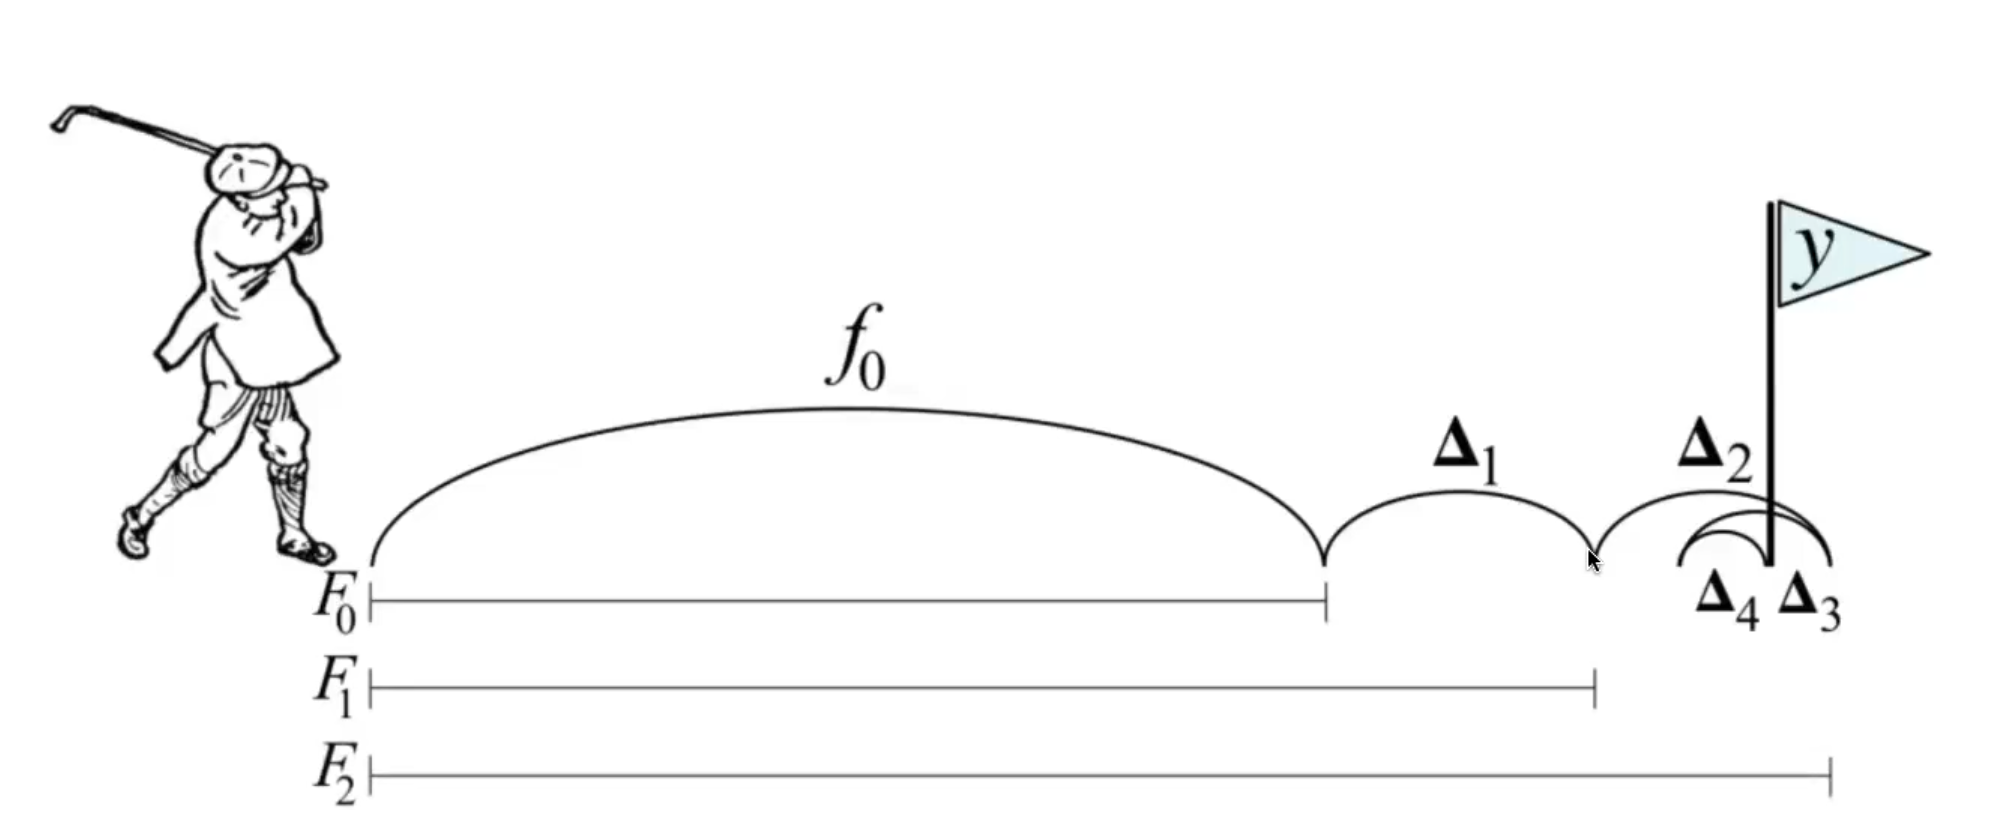

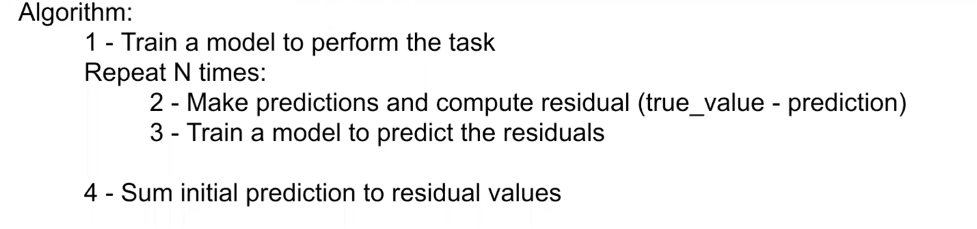

In [20]:
# Boston dataset
# Target: price
# Features: attributes of the houses

from sklearn.datasets import load_boston

In [21]:
boston = load_boston()

In [22]:
X = boston.data

In [23]:
y = boston.target

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(max_depth=2)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 29.963847905180092


In [30]:
# Get the residual
y_train_red = clf.predict(X_train)
y_red = y_train - y_train_red # residual = actual - predict

In [31]:
clf2 = DecisionTreeRegressor(max_depth=2)

In [32]:
# Boosting:
# Train on residual, NOT on actual Y
clf2.fit(X_train, y_red)

DecisionTreeRegressor(max_depth=2)

In [33]:
y_pred_red = clf2.predict(X_test)

In [34]:
# classifier 1 (trained on actual y) + classifier 2 (trained on residual)
y_pred = clf.predict(X_test) + clf2.predict(X_test)

In [35]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

MSE: 25.288890058759822


### Smaller MSE (25.29 vs. 29.96 ) - boosting brings better result
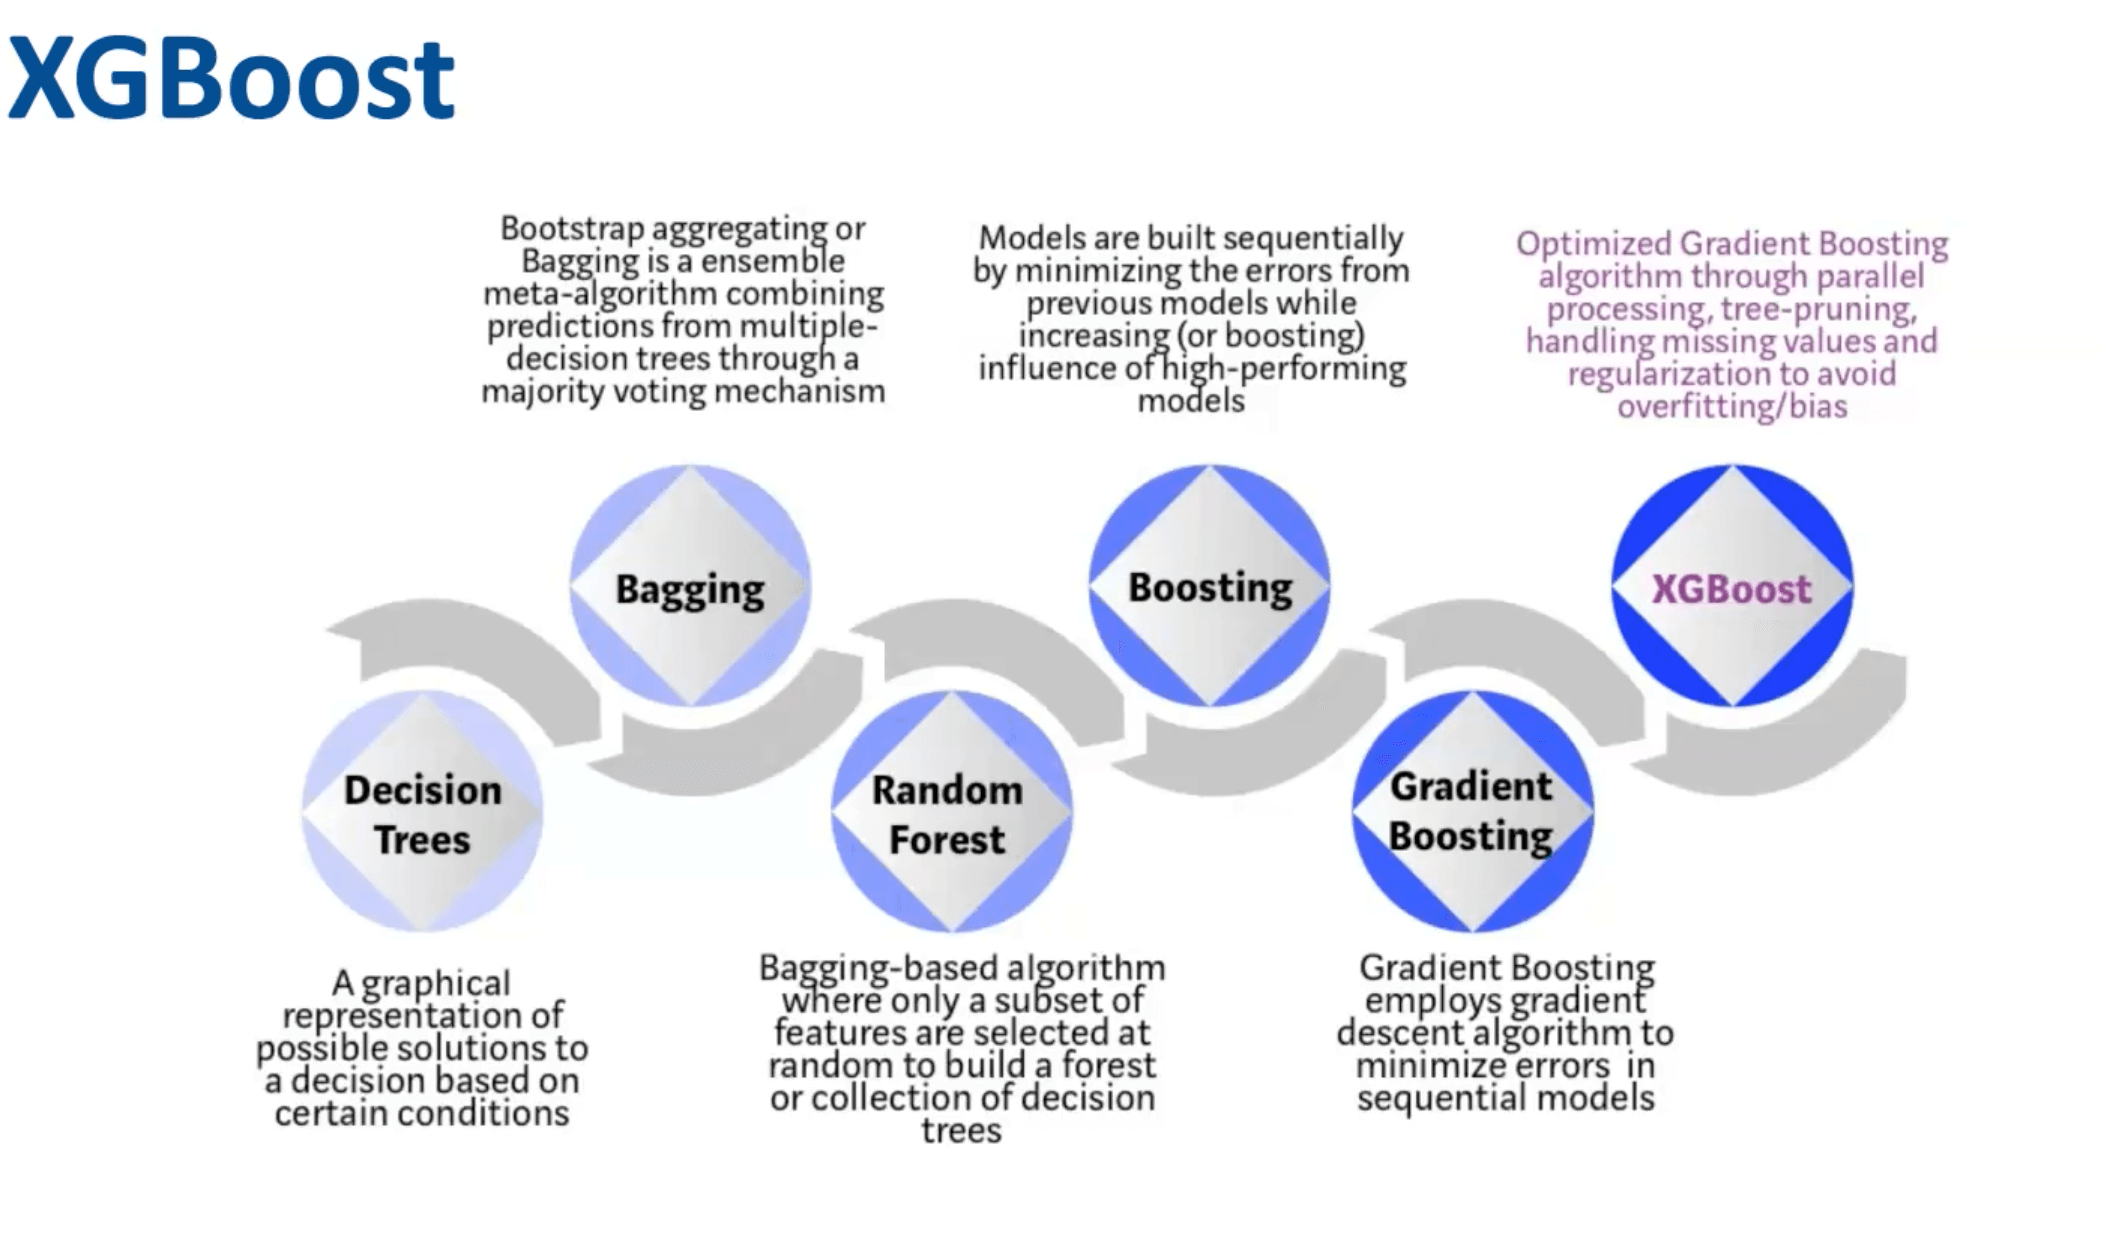

# Stacking

- Get predictions/output/probabilities of each one of the models
- Feed that as the input for **another model**, learn from those predictions

**Idea of stacking**:
- Maybe there are some relations between the outputs of each one of models
- We may NOT be able to understand, but a ML model may

In [38]:
# import iris data - again

iris = datasets.load_iris()
X = iris.data[:, :2]  # only take the first two features.
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

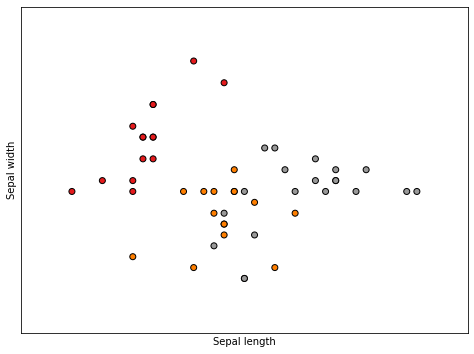

Classifier number 10
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       0.47      0.60      0.53        15
           2       0.57      0.50      0.53        16

    accuracy                           0.68        50
   macro avg       0.68      0.66      0.67        50
weighted avg       0.70      0.68      0.69        50



In [39]:
scores, classifier_list= get_scores_and_clf_list(model=DecisionTreeClassifier, draw = True)

In [40]:
sum(scores)/len(scores)

0.6800883864259331

In [45]:
import numpy as np

def get_new_X_for_stacking(X, y):
    new_X = []

    for idx, label in enumerate(y):
        instance = X[idx] #
        predictions = [clf[1].predict_proba(instance.reshape(1, -1))[0] for clf in classifier_list]
        new_X.append(np.concatenate(predictions))
        
    print(new_X[0])
    return new_X

In [46]:
new_X_train = get_new_X_for_stacking(X_train, y_train)
clf = LogisticRegression() 
# New model: Logistic Regression
# The results from the decision tree feed into this new model

clf.fit(new_X_train, y_train)

[0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0.]


LogisticRegression()

In [47]:
y_pred = clf.predict(get_new_X_for_stacking(X_test, y_test))

[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 0.]


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.58      0.47      0.52        15
           2       0.58      0.69      0.63        16

    accuracy                           0.74        50
   macro avg       0.72      0.72      0.72        50
weighted avg       0.74      0.74      0.74        50



## Stacking conclusion
- accuracy 0.74, better than original 0.68
- There is a 50/50 chance that stacking would do better, because putting model on top of models is actually propagating errors
- But worth trying
- Can use when not getting the results that are expected